Importando Dados

In [ ]:
import tensorflow
from tensorflow import keras
import keras
import matplotlib.pyplot as plt




dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


# len(imagens_treino)
# imagens_treino.shape
# imagens_teste.shape
# len(identificacoes_teste)

In [ ]:
print("numero de imagens de treino:          %d" % len(imagens_treino))
print("numero de imagens de teste:           %d" % len(imagens_teste))

print("numero de identificadores de teste:   %d" % len(identificacoes_teste))
print("numero de identificadores de treino:  %d" % len(identificacoes_treino))


print("shape imagens_treino:            ", imagens_treino.shape)
print("shape imagens_teste :            ", imagens_teste.shape)
print("shape identificadores de teste:  ", identificacoes_teste.shape)
print("shape identificadores de treino: ", identificacoes_treino.shape)

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model


Visualizando Primeira imagem

In [ ]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

Criando nomes para os classificadores

In [ ]:
nomes_de_classificadores = ['Camiseta',"Calça","Pullover","Vestido","Casaco","Sandália","Camisa","Tênis","Bolsa","Bota"]

Plotando todas as imagens

In [ ]:
plt.imshow(imagens_treino[0])
plt.colorbar()

In [ ]:
for imagem in range(10):
    plt.subplot(2,5,imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificadores[identificacoes_treino[imagem]])

Normalização das imagens

In [ ]:
imagens_treino = imagens_treino/float(255)
# imagens_treino/255.0

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256,activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    # keras.layers.Dense(128,activation=tensorflow.nn.relu),
    # keras.layers.Dense(64,activation=tensorflow.nn.relu),
    keras.layers.Dense(10,activation=tensorflow.nn.softmax)
    ])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#entropia categorica cruzada emparsa


    # Entrada
    # Processamento (ReLU) Rectified Linear Unit 
    # Saida


historico = modelo.fit(imagens_treino,identificacoes_treino,epochs=5, validation_split=0.2)




Sumário do modelo

In [ ]:
sumario_do_modelo = modelo.summary()

Pesos e vies da primera camada Dense

In [55]:
pesos_camada_dense = np.array(modelo.layers[1].get_weights()[0])
pesos_camada_dense.shape


(784, 256)

In [59]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino,identificacoes_treino,epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5385 - accuracy: 0.8075 - val_loss: 0.4211 - val_accuracy: 0.8467
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4109 - accuracy: 0.8489 - val_loss: 0.3840 - val_accuracy: 0.8587
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3753 - accuracy: 0.8614 - val_loss: 0.3671 - val_accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3534 - accuracy: 0.8704 - val_loss: 0.3506 - val_accuracy: 0.8741
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.8757 - val_loss: 0.3372 - val_accuracy: 0.8788


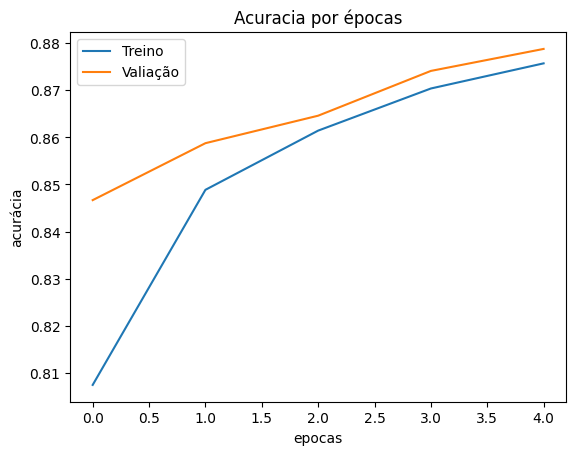

In [60]:

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Acuracia por épocas")
plt.xlabel('epocas')
plt.ylabel("acurácia")
plt.legend(['Treino','Valiação'])

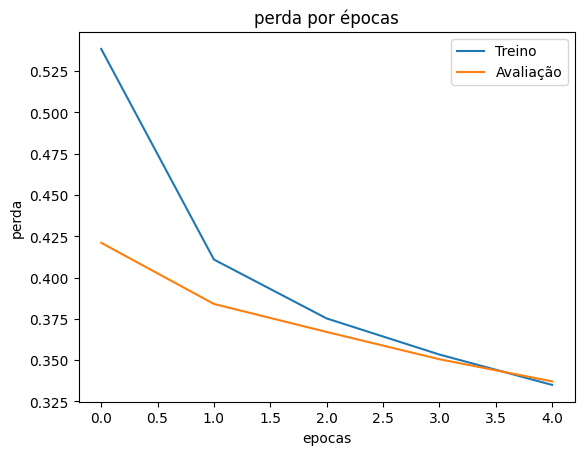

In [61]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("perda por épocas")
plt.xlabel('epocas')
plt.ylabel("perda")
plt.legend(['Treino','Avaliação'])

In [57]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [58]:
pesos_camada_dense_zerados  = np.zeros((784,256))
pesos_camada_dense_zerados
modelo.layers[1].set_weights([pesos_camada_dense_zerados,vieses_camada_dense])

Salvando e carregando o modelo treinado

In [ ]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Testes

In [ ]:

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Acuracia por épocas")
plt.xlabel('epocas')
plt.ylabel("acurácia")
plt.legend(['Treino','Valiação'])

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("perda por épocas")
plt.xlabel('epocas')
plt.ylabel("perda")
plt.legend(['Treino','Avaliação'])

In [ ]:
historico.history

In [ ]:
testes = modelo.predict(imagens_teste)
print('resultado teste: %d' % np.argmax(testes[1]))
print("número da iamgem de teste: %d" % identificacoes_teste[1])


In [ ]:
perda_teste , acuracia_teste = modelo.evaluate(imagens_teste,identificacoes_teste)
print("Perda do teste : %f" % perda_teste)
print("Acuracia do teste %f" % (acuracia_teste * 100))

testes com modelo salvo

In [ ]:
testes = modelo_salvo.predict(imagens_teste)
print('resultado teste: %d' % np.argmax(testes[1]))
print("número da iamgem de teste: %d" % identificacoes_teste[1])